<a href="https://colab.research.google.com/github/AshWinShaRma37/ChatBot/blob/main/ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started



---

Getting the intents file from github

---



In [1]:
!wget https://raw.githubusercontent.com/AshWinShaRma37/ChatBot/main/intents.json

--2022-08-11 16:43:30--  https://raw.githubusercontent.com/AshWinShaRma37/ChatBot/main/intents.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51067 (50K) [text/plain]
Saving to: ‘intents.json’

intents.json        100%[===================>]  49.87K  --.-KB/s    in 0.001s  

2022-08-11 16:43:31 (57.6 MB/s) - ‘intents.json’ saved [51067/51067]





---

Installing required libraries and Importing Packages

---



In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycricbuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install COVID19Py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for COVID19Py: filename=COVID19Py-0.3.0-py3-none-any.whl size=4719 sha256=eaac6750daa95e1da63cd0555951131b19a73afe0690c7b54233d47ea1b426ea
  Stored in directory: /root/.cache/pip/wheels/e9/bc/21/68d8cc9b49a6c3386135288d365e53c697087e19eaa7c893a5
Successfully built COVID19Py


In [5]:
!pip install billboard.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv1D
from tensorflow.keras.optimizers import SGD
import random
#For google searches and weather info
from googlesearch import *
import webbrowser
import requests
#For cricket info
from pycricbuzz import Cricbuzz
#For covid details
import COVID19Py
import time
import datetime

import webbrowser
import requests
#For getting cricket info
from pycricbuzz import Cricbuzz
#For getting songs list
import billboard

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 29.4 MB/s 




---


Creatng dataset from intents file


---



In [11]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('/content/intents.json').read()
intents = json.loads(data_file)


for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)

        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add tags to classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)


pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

# create our training data
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])

# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data is created")


180 documents
34 classes ['', 'Clever', 'CourtesyGoodBye', 'CourtesyGreeting', 'CourtesyGreetingResponse', 'CurrentHumanQuery', 'Gossip', 'GreetingResponse', 'Jokes', 'Love', 'NameQuery', 'NotTalking2U', 'SelfAware', 'Shutup', 'Thanks', 'UnderstandQuery', 'activity', 'age', 'appreciation', 'compliment', 'covid19', 'cricket', 'datetime', 'exclaim', 'goodbye', 'google', 'greeting', 'haha', 'insult', 'options', 'riddle', 'song', 'weather', 'whatsup']
155 unique lemmatized words ["'s", ',', '10', '19', 'a', 'about', 'adam', 'age', 'am', 'any', 'anyone', 'are', 'ask', 'aware', 'awesome', 'be', 'bella', 'best', 'bored', 'by', 'bye', 'call', 'can', 'cao', 'cheering', 'clever', 'communicating', 'comprendo', 'conscious', 'could', 'covid', 'cricket', 'current', 'cya', 'date', 'day', 'do', 'doing', 'dumb', 'enough', 'for', 'friend', 'funny', 'genious', 'get', 'give', 'good', 'goodbye', 'google', 'gossip', 'got', 'great', 'greeting', 'haha', 'have', 'hear', 'hello', 'help', 'helpful', 'hey', 'hi',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# Building and tuning the model



---


Defining the model



---



In [12]:
def make_model(mods):
  input_shape=(len(train_x[0]),)
  model=Sequential()
  model.add(Dense(mods.Int('units_1', min_value=16, max_value=256,step=16),activation=mods.Choice("activation_1", ["relu","elu","softmax","selu","sigmoid"]), input_shape=(len(train_x[0]),)))
  model.add(Dropout(mods.Choice('rate_1', [0.0,0.1,0.2,0.3,0.4,0.5]))) 
  model.add(Dense(mods.Int('units_2', min_value=16, max_value=256,step=16),activation=mods.Choice("activation_2", ["relu","elu","softmax","selu","sigmoid"])))
  model.add(Dropout(mods.Choice('rate_2', [0.0,0.1,0.2,0.3,0.4,0.5])))
  model.add(Dense(len(train_y[0]),activation=mods.Choice("activation_3", ["relu","softmax","sigmoid"])))
  model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
  model.summary()
  return model




---


Importing keras tuner and tuning the hyperparmeters

---



In [13]:
import keras_tuner as kt
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=100,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

tuner=kt.RandomSearch(make_model,objective = 'val_accuracy', max_trials=30, overwrite=True )

tuner.search(np.array(train_x), np.array(train_y), epochs=200, batch_size=10, validation_split=0.2, verbose=1, callbacks=[es])
tuner.search_space_summary()
tuner.results_summary()

Trial 30 Complete [00h 00m 17s]
val_accuracy: 0.6111111044883728

Best val_accuracy So Far: 0.6111111044883728
Total elapsed time: 00h 08m 05s
Search space summary
Default search space size: 7
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'softmax', 'selu', 'sigmoid'], 'ordered': False}
rate_1 (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'softmax', 'selu', 'sigmoid'], 'ordered': False}
rate_2 (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
activation_3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax



---


Defining function to plot training and validation curves


---



In [14]:
import matplotlib.pyplot as plt
def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()



---

Getting the training and validation curves for 5 best models

---



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 224)               34944     
                                                                 
 dropout_12 (Dropout)        (None, 224)               0         
                                                                 
 dense_19 (Dense)            (None, 80)                18000     
                                                                 
 dropout_13 (Dropout)        (None, 80)                0         
                                                                 
 dense_20 (Dense)            (None, 34)                2754      
                                                                 
Total params: 55,698
Trainable params: 55,698
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
29/29 [==============================]

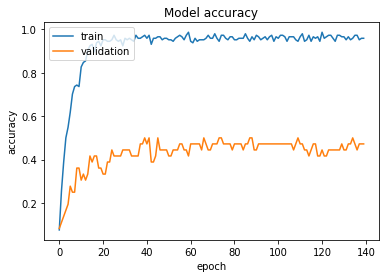

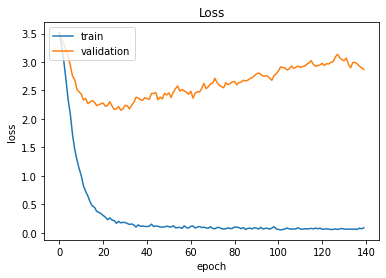

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 176)               27456     
                                                                 
 dropout_14 (Dropout)        (None, 176)               0         
                                                                 
 dense_22 (Dense)            (None, 192)               33984     
                                                                 
 dropout_15 (Dropout)        (None, 192)               0         
                                                                 
 dense_23 (Dense)            (None, 34)                6562      
                                                                 
Total params: 68,002
Trainable params: 68,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
29/29 [==============================]

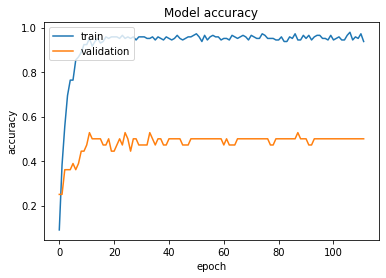

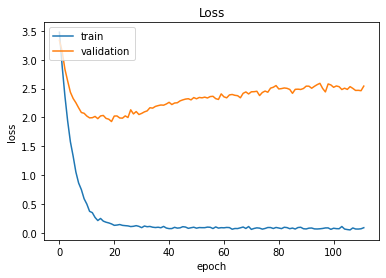

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 144)               22464     
                                                                 
 dropout_16 (Dropout)        (None, 144)               0         
                                                                 
 dense_25 (Dense)            (None, 80)                11600     
                                                                 
 dropout_17 (Dropout)        (None, 80)                0         
                                                                 
 dense_26 (Dense)            (None, 34)                2754      
                                                                 
Total params: 36,818
Trainable params: 36,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
29/29 [==============================]

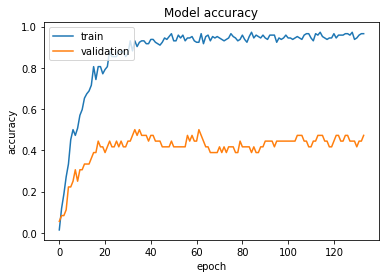

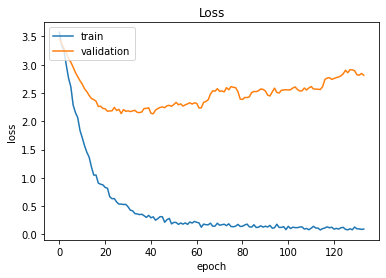

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               19968     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 192)               24768     
                                                                 
 dropout_19 (Dropout)        (None, 192)               0         
                                                                 
 dense_29 (Dense)            (None, 34)                6562      
                                                                 
Total params: 51,298
Trainable params: 51,298
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
29/29 [==============================]

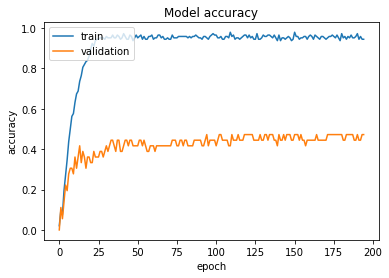

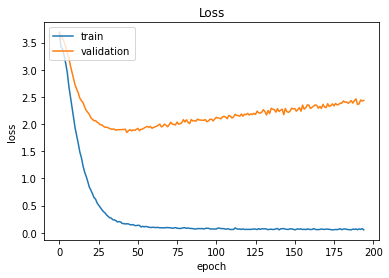

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                2496      
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                1088      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 34)                2210      
                                                                 
Total params: 5,794
Trainable params: 5,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
29/29 [==============================] 

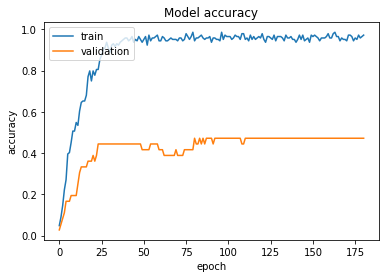

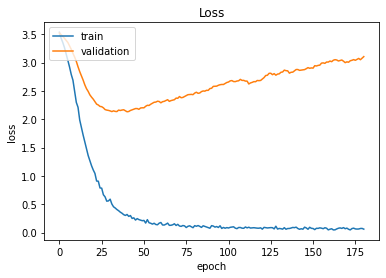

In [17]:
best_trials = tuner.get_best_hyperparameters(num_trials=5)
i=0
for trial in best_trials:
    model = tuner.hypermodel.build(trial)
    history = model.fit(np.array(train_x), np.array(train_y), validation_split=0.2, epochs=400, batch_size=5, verbose=1 ,callbacks=[es])
    # Plot the accuracy
    plt_metric(history=history.history, metric="accuracy", title="Model accuracy")
    # Plot the loss
    plt_metric(history=history.history, metric="loss", title="Loss")
    i+=1
    model.save(str(i))

#Getting Results



---

Setting up functions to chat with the bot

---



In [18]:
from keras.models import load_model
import time
model = load_model('1')
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(return_list, intents_json):
    
    if len(return_list)==0:
        tag='noanswer'
    else:    
        tag=return_list[0]['intent']
    if tag=='datetime':        
        print(time.strftime("%A"))
        print (time.strftime("%d %B %Y"))
        print (time.strftime("%H:%M:%S"))

    if tag=='google':
        query=input('Enter query...')
        for j in search(query, tld="co.in", num=10, stop=10, pause=2):
          print(j)
    if tag=='weather':
      from bs4 import BeautifulSoup
      #enter city name
      city = "lucknow"
      # create url
      url = "https://www.google.com/search?q="+"weather"+city
      # requests instance
      html = requests.get(url).content
      # getting raw data
      soup = BeautifulSoup(html, 'html.parser')
      
      # get the temperature
      temp = soup.find('div', attrs={'class': 'BNeawe iBp4i AP7Wnd'}).text
 
      # this contains time and sky description
      str = soup.find('div', attrs={'class': 'BNeawe tAd8D AP7Wnd'}).text
 
      # format the data
      data = str.split('\n')
      time = data[0]
      sky = data[1]
      # getting all div tag
      listdiv = soup.findAll('div', attrs={'class': 'BNeawe s3v9rd AP7Wnd'})
      strd = listdiv[5].text
       
      # getting other required data
      pos = strd.find('Wind')
      other_data = strd[pos:]
       
      # printing all data
      print("Temperature is", temp)
      print("Time: ", time)
      print("Sky Description: ", sky)
      print(other_data)
    if tag=='news':
        main_url = " http://newsapi.org/v2/top-headlines?country=in&apiKey=bc88c2e1ddd440d1be2cb0788d027ae2"
        open_news_page = requests.get(main_url).json()
        article = open_news_page["articles"]
        results = [] 
          
        for ar in article: 
            results.append([ar["title"],ar["url"]]) 
          
        for i in range(10): 
            print(i + 1, results[i][0])
            print(results[i][1],'\n')
            
    if tag=='cricket':
        c = Cricbuzz()
        matches = c.matches()
        for match in matches:
            print(match['srs'],' ',match['mnum'],' ',match['status'])
    
    if tag=='song':
        chart=billboard.ChartData('hot-100')
        print('The top 10 songs at the moment are:')
        for i in range(10):
            song=chart[i]
            print(song.title,'- ',song.artist)
    if tag=='covid19':
        
        covid19=COVID19Py.COVID19(data_source='jhu')
        country=input('Enter Location...')
        
        if country.lower()=='world':
            latest_world=covid19.getLatest()
            print('Confirmed:',latest_world['confirmed'],' Deaths:',latest_world['deaths'])
        
        else:
                
            latest=covid19.getLocations()
            
            latest_conf=[]
            latest_deaths=[]
            for i in range(len(latest)):
                
                if latest[i]['country'].lower()== country.lower():
                    latest_conf.append(latest[i]['latest']['confirmed'])
                    latest_deaths.append(latest[i]['latest']['deaths'])
            latest_conf=np.array(latest_conf)
            latest_deaths=np.array(latest_deaths)
            print('Confirmed: ',np.sum(latest_conf),'Deaths: ',np.sum(latest_deaths))

    list_of_intents= intents_json['intents']    
    for i in list_of_intents:
        if tag==i['tag'] :
            result= random.choice(i['responses'])
    return result
def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res




---

Final Result

---




In [19]:
msg = input("you:")
while msg!="quit":
  res = chatbot_response(msg)
  print("ChatBot:"+res)
  
  msg = input("you:")

you:Hi
ChatBot:Hello!
you:how are you
ChatBot:Hello!
you:How are you?
ChatBot:Good to see you again!
you:weather at delhi
Temperature is 30°C
Time:  Thursday 10:28 pm
Sky Description:  Haze
.
ChatBot:...
you:can you google something
Enter query...chatbot
https://www.chatbot.com/
https://app.chatbot.com/
https://www.chatbot.com/pricing/
https://www.chatbot.com/features/
https://status.chatbot.com/
https://www.bbc.com/news/technology-62497674
https://www.vice.com/en/article/qjkkgm/facebooks-ai-chatbot-since-deleting-facebook-my-life-has-been-much-better
https://www.dailymail.co.uk/sciencetech/article-11098479/Metas-new-AI-chatbot-BlenderBot-3-calls-Mark-Zuckerberg-creepy.html
https://www.oracle.com/sg/chatbots/what-is-a-chatbot/
https://en.wikipedia.org/wiki/Chatbot
ChatBot:Here are some of the google searches
you:can you suggest some songs?
The top 10 songs at the moment are:
Break My Soul -  Beyonce
About Damn Time -  Lizzo
As It Was -  Harry Styles
Running Up That Hill (A Deal With Go